<a href="https://colab.research.google.com/github/vedanth-aggarwal/twitter_disaster_tweet_NLP_prediction/blob/main/diastertweet_nlp_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to NLP
- Deriving information out of natural languages ( sequences text or speech )
- Sequence to sequence (seq2seq) problems
- Many to one, one to many, one to one, many to many

In [ ]:
# Introduction to NLP
!nvidia-smi - L

ERROR: Option - is not recognized. Please run 'nvidia-smi -h'.



In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-09 13:53:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-09 13:53:01 (67.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## DATASETS
- Let's start by download a text dataset. We'll be using the Real or Not? dataset from Kaggle which contains text-based Tweets about natural disasters.

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-05-09 13:53:10--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 209.85.145.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2024-05-09 13:53:10 (132 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## VISUALIZATION

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle
train_df_shuffled = train_df.sample(frac=1,random_state=42)

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()
# tf imbalanced classification steps are different

target
0    4342
1    3271
Name: count, dtype: int64

In [ ]:
# Total samples
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
# Random samples
import random
rand_index = random.randint(0,len(train_df) - 5)
for row in train_df_shuffled[['text','target']][rand_index:rand_index+5].itertuples():
  _,text,target = row
  print(target,text)


0 Help me win $$$$ by having the most shares on my article! A Lifetime Of Fear http://t.co/9eh2lCQkxl  Thanks! #BlackInAmerica #GrowingUpBlack
0 @tsunami_esh ESH PLEASE OKAY!
1 17 dead as Afghanistan aircraft crashes: An Afghan military helicopter has crashed in a remote region of the s...  http://t.co/kI9eHjHl8y
0 Strange to encaustic cerography portion him till give voice deluge: bYITyf http://t.co/I7ap1MES8M
0 That sounds about right. Our building will have a thunderstorm inside one day when the air masses collide. https://t.co/2rTQ9QmGPB


In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,random_state=42) # dedicate 10% of samples to validation set


In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

##Converting text to numbers
- Tokenization of word level through 1,2,3 or one hot encoding or character level or sub word ( char + word ) tokenization ( DIRECT MAPPING )
- Embedding converts words into feature vectors ( new or pretrained )
- Embedding is more scalable and values can be updated not static
- Word2Vec, Glove embeddings - Tensorflow Hub

####Vectorization

In [ ]:
### Text vectorization / Tokenization
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables - None means default
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text) ( <00V> for less common words)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

# all output sequences should be equal to longest sentence ( padd with zeros )

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))


15

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences) # not val or test

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Tonight is being quite interesting... A few minutes ago the fire system went off and we had to evacuate the building.      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 383,    9,  121, 1612, 1281,    3,  548, 1271,  750,    2,   42,
        1584,  492,  102,    7]])>

####Embeddings

The main parameters we're concerned about here are:

- input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
- output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
- embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
- input_length - Length of sequences being passed to embedding layer.

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector # numbers divisble by 8 are good
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
@carolinagutierr grande twister!!!      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02820424, -0.04574805, -0.01050543, ...,  0.03500581,
         -0.01535522,  0.02175969],
        [-0.00036634,  0.02297563, -0.04845418, ...,  0.02175475,
          0.02321103,  0.00677322],
        [-0.00667227, -0.00233445,  0.02577132, ...,  0.02771913,
          0.02230001, -0.01180504],
        ...,
        [-0.01760245, -0.01201748, -0.0187614 , ...,  0.02461879,
          0.01262825,  0.018039  ],
        [-0.01760245, -0.01201748, -0.0187614 , ...,  0.02461879,
          0.01262825,  0.018039  ],
        [-0.01760245, -0.01201748, -0.0187614 , ...,  0.02461879,
          0.01262825,  0.018039  ]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02820424, -0.04574805, -0.01050543, -0.04697243, -0.01653067,
        0.03283178,  0.04146251, -0.0020938 ,  0.0052744 , -0.01245749,
        0.01073267, -0.01535545,  0.00860742,  0.0481103 ,  0.00852904,
        0.04430089,  0.0121393 , -0.01814915, -0.0036997 , -0.00065633,
       -0.00848686,  0.03496987, -0.00739856, -0.01650028, -0.01419233,
       -0.02822985, -0.02945613,  0.02890486, -0.00580885,  0.04041703,
        0.04598529, -0.03104537,  0.01194737, -0.04403242, -0.03428645,
       -0.02964299,  0.00428098, -0.04952989, -0.00240711, -0.01575615,
        0.01449836, -0.01590238,  0.00957494,  0.00122087,  0.03190399,
       -0.00990567, -0.02221521, -0.02812808, -0.008439  , -0.00036145,
       -0.01039945, -0.04884953,  0.04630018, -0.02854989,  0.00979898,
       -0.04978942,  0.04283215, -0.01217146, -0.0242725 , -0.00166725,
       -0.00415354,  0.0110114 ,  0.00606902,  0.01638931, -0.01073406,
        0.033211

##Model Building
- Scikit learn machine learning map
- Model 0: Naive Bayes (baseline)
- Model 1: Feed-forward neural network (dense model)
- Model 2: LSTM model
- Model 3: GRU model
- Model 4: Bidirectional-LSTM model
- Model 5: 1D Convolutional Neural Network
- Model 6: TensorFlow Hub Pretrained Feature Extractor

###Model 0: Naive Bayes ( Baseline ) with TF-IDF encoder
- Sklearn Multinomial Naive Bayes using TF-IDF formula
- Baseline is non deep learning because of speed and later DL to improve them

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline - order of Steps
model0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text - clf is classifier shortform
])

# Fit the pipeline to the training data
model0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate
baseline_score = model0.score(val_sentences,val_labels)
print(f'Accuracy : {baseline_score}')

Accuracy : 0.7926509186351706


In [ ]:
baseline_preds = model0.predict(val_sentences)
baseline_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
# High precision - less false positive
# High recall - less false negatives

# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted") # label imabalance weighted accounts
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### MODEL 1 : FFNN DENSE MODEL

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Fit the model
## input sentences can be a list of strings due to text preprocessing layer built-in model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240509-123358
Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.6097 - accuracy: 0.6919 - val_loss: 0.5354 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4409 - accuracy: 0.8186 - val_loss: 0.4686 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3462 - accuracy: 0.8612 - val_loss: 0.4585 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2847 - accuracy: 0.8933 - val_loss: 0.4637 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2378 - accuracy: 0.9118 - val_loss: 0.4762 - val_accuracy: 0.7874


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
model_1.evaluate(val_sentences,val_labels)

# Without global pooling it gives 1 prediction per token not 1 per sentence

24/24 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7874


[0.4761882424354553, 0.787401556968689]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-1.1359873e-02, -5.0991435e-02, -2.4916690e-03, ...,
         -5.6858029e-02,  5.8226600e-02, -3.3029979e-03],
        [-4.7570118e-03, -3.5000015e-02, -7.9951929e-03, ...,
          3.2575477e-03,  1.3384751e-02,  9.6760821e-03],
        [ 3.4420148e-02,  4.1721547e-03, -4.9818885e-03, ...,
          2.4948612e-02,  5.2167200e-02, -4.8317324e-02],
        ...,
        [-3.0845452e-02, -2.5071204e-05,  4.7297124e-02, ...,
         -4.5625329e-02, -1.3025180e-03,  1.4134351e-02],
        [ 5.4969929e-02, -8.3128177e-02, -3.7577923e-02, ...,
         -9.5675932e-03,  3.4452803e-02, -6.0373668e-02],
        [ 7.2058804e-02, -9.7450390e-02, -1.0377273e-01, ...,
         -4.4308603e-02,  1.0397858e-01, -7.9247437e-02]], dtype=float32)>]

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_results = calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f} / New {key}: {new_model_results[key]:.2f} / Difference: {new_model_results[key]-value:.2f}")

#compare_baseline_to_new_results(baseline_results=baseline_results,
#                                new_model_results=model_1_results)

####Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same as vocab size and embedding dimensions

(10000, 128)


In [ ]:
# http://projector.tensorflow.org/
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# # Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8") # vector
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8") # vocab

# # Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
   if num == 0:
      continue # skip padding token
   vec = embed_weights[num]
   out_m.write(word + "\n") # write words to file
   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file

out_v.close()
out_m.close()


In [ ]:
# Jay Alumnar - ML Blog

# # Download files locally to upload to Embedding Projector
try:
   from google.colab import files
except ImportError:
   pass
else:
   files.download("embedding_vectors.tsv")
   files.download("embedding_metadata.tsv")#

# 2 clusters formed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model 2 : RNN  - LSTM
- Useful for sequence data
- Use representation of previous input to aid later input
- Long short term memory
- Structure
  - Input text, tokenize, embed
  - RNN dense layers
  - Output label probs

In [ ]:
from tensorflow.keras import layers
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model - tanh activation
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
##x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
#print(x.shape)
x = layers.LSTM(units=64)(x) # return vector for whole sequence
print(x.shape)
#x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240509-135556
Epoch 1/5
215/215 [==============================] - 12s 42ms/step - loss: 0.5074 - accuracy: 0.7441 - val_loss: 0.4571 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3163 - accuracy: 0.8730 - val_loss: 0.5131 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 8s 35ms/step - loss: 0.2202 - accuracy: 0.9169 - val_loss: 0.5899 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 8s 38ms/step - loss: 0.1558 - accuracy: 0.9445 - val_loss: 0.6359 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.1077 - accuracy: 0.9604 - val_loss: 0.8400 - val_accuracy: 0.7638


In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.59055118110236,
 'precision': 0.7567160722556739,
 'recall': 0.7559055118110236,
 'f1': 0.7539595513230887}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27 / New accuracy: 75.59 / Difference: -3.67
Baseline precision: 0.81 / New precision: 0.76 / Difference: -0.05
Baseline recall: 0.79 / New recall: 0.76 / Difference: -0.04
Baseline f1: 0.79 / New f1: 0.75 / Difference: -0.03


###Model 3 : GRU
- Gaited recurrent unit
- Similar features to LSTM but with less parameters

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
# Can combine with LSTM
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240509-124635
Epoch 1/5
215/215 [==============================] - 11s 39ms/step - loss: 0.5246 - accuracy: 0.7307 - val_loss: 0.4558 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3171 - accuracy: 0.8688 - val_loss: 0.4919 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2169 - accuracy: 0.9150 - val_loss: 0.5642 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1539 - accuracy: 0.9464 - val_loss: 0.6329 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1157 - accuracy: 0.9603 - val_loss: 0.6255 - val_accuracy: 0.7651


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]



24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.37168884],
        [0.88671595],
        [0.99727935],
        [0.1241135 ],
        [0.01529015],
        [0.9931722 ],
        [0.7172366 ],
        [0.99708146],
        [0.9975418 ],
        [0.5388472 ]], dtype=float32))

In [ ]:

# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.50918635170603,
 'precision': 0.7648935744284318,
 'recall': 0.7650918635170604,
 'f1': 0.7641581623335479}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27 / New accuracy: 76.51 / Difference: -2.76
Baseline precision: 0.81 / New precision: 0.76 / Difference: -0.05
Baseline recall: 0.79 / New recall: 0.77 / Difference: -0.03
Baseline f1: 0.79 / New f1: 0.76 / Difference: -0.02


###Model 4 : Bidirectional RNN Model
- Goes left to right and right to left through data
- Takes longer training time and has more parameters
- Good for sequences like longer passage, machine translation

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240509-125202
Epoch 1/5
215/215 [==============================] - 13s 37ms/step - loss: 0.5092 - accuracy: 0.7462 - val_loss: 0.4584 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3127 - accuracy: 0.8718 - val_loss: 0.5220 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2131 - accuracy: 0.9174 - val_loss: 0.5682 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1465 - accuracy: 0.9511 - val_loss: 0.6544 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1029 - accuracy: 0.9658 - val_loss: 0.6977 - val_accuracy: 0.7677


In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)

# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:5]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
# Check to see how the bidirectional model performs against the baseline
# Calculate bidirectional RNN model results

model_4_results = calculate_results(val_labels, model_4_preds)
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27 / New accuracy: 76.77 / Difference: -2.49
Baseline precision: 0.81 / New precision: 0.77 / Difference: -0.04
Baseline recall: 0.79 / New recall: 0.77 / Difference: -0.02
Baseline f1: 0.79 / New f1: 0.77 / Difference: -0.02


###Model 5 : Conv1D

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding

# Embedding is batch, input length, output dim

conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.03233879, -0.0283304 ,  0.02956488, ...,  0.01661876,
           0.01021261, -0.01458348],
         [-0.05505217, -0.05485234,  0.00565584, ..., -0.07203616,
          -0.00861035, -0.07377914],
         [-0.01771857, -0.01436662, -0.00990692, ..., -0.03216221,
          -0.03637523,  0.00656419],
         ...,
         [-0.02051431, -0.06429007, -0.04430297, ...,  0.02494415,
           0.01192292, -0.03290159],
         [-0.02051431, -0.06429007, -0.04430297, ...,  0.02494415,
           0.01192292, -0.03290159],
         [-0.02051431, -0.06429007, -0.04430297, ...,  0.02494415,
           0.01192292, -0.03290159]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.1293615 , 0.        , 0.        , 0.05862991,
          0.        , 0.        , 0.03784649, 0.        , 0.00811042,
          0.02781053, 0.        , 0.06832418, 0.07750486, 0.        ,
          0.        , 0.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

###### VISIT : MIT DEEP LEARNING

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240509-130007
Epoch 1/5
215/215 [==============================] - 14s 46ms/step - loss: 0.5629 - accuracy: 0.7208 - val_loss: 0.4686 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3422 - accuracy: 0.8587 - val_loss: 0.4690 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2153 - accuracy: 0.9223 - val_loss: 0.5335 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1398 - accuracy: 0.9526 - val_loss: 0.6037 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0978 - accuracy: 0.9666 - val_loss: 0.6628 - val_accuracy: 0.7795


In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

24/24 [==============================] - 0s 7ms/step


In [ ]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.95275590551181,
 'precision': 0.7837012857570019,
 'recall': 0.7795275590551181,
 'f1': 0.7765763088894867}

In [ ]:
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27 / New accuracy: 77.95 / Difference: -1.31
Baseline precision: 0.81 / New precision: 0.78 / Difference: -0.03
Baseline recall: 0.79 / New recall: 0.78 / Difference: -0.01
Baseline f1: 0.79 / New f1: 0.78 / Difference: -0.01


###Model 6: TensorFlow Hub Pretrained Sentence Encoder
- Using pretrained embeddings / transfer learning
- An encoder is the name for a model which converts raw data such as text into a numerical representation (feature vector), a decoder converts the numerical representation to a desired output.

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

## Each sentence has been encoded into a 512 dimension vector

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model is variable but output is constant
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240509-135833
Epoch 1/5
215/215 [==============================] - 8s 15ms/step - loss: 0.5045 - accuracy: 0.7834 - val_loss: 0.4500 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4155 - accuracy: 0.8154 - val_loss: 0.4384 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4013 - accuracy: 0.8216 - val_loss: 0.4342 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3947 - accuracy: 0.8250 - val_loss: 0.4298 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3891 - accuracy: 0.8281 - val_loss: 0.4306 - val_accuracy: 0.8176


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)

# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)

# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

24/24 [==============================] - 1s 21ms/step
Baseline accuracy: 79.27 / New accuracy: 81.76 / Difference: 2.49
Baseline precision: 0.81 / New precision: 0.82 / Difference: 0.01
Baseline recall: 0.79 / New recall: 0.82 / Difference: 0.02
Baseline f1: 0.79 / New f1: 0.82 / Difference: 0.03


### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data
* To make sure we're making an appropriate comparison between our model's ability to learn from the full training set and 10% subset, we'll clone our USE model (model_6) using the tf.keras.models.clone_model() method.

* Doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all others will be reset).

In [ ]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
import numpy as np
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1)
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")


Total training examples: 6851
Length of 10% training examples: 686


In [ ]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    397
1    289
Name: count, dtype: int64

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240509-133156
Epoch 1/5
22/22 [==============================] - 4s 50ms/step - loss: 0.6741 - accuracy: 0.6458 - val_loss: 0.6463 - val_accuracy: 0.7402
Epoch 2/5
22/22 [==============================] - 1s 29ms/step - loss: 0.6077 - accuracy: 0.7988 - val_loss: 0.5862 - val_accuracy: 0.7677
Epoch 3/5
22/22 [==============================] - 1s 54ms/step - loss: 0.5354 - accuracy: 0.8207 - val_loss: 0.5298 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 1s 43ms/step - loss: 0.4738 - accuracy: 0.8324 - val_loss: 0.4933 - val_accuracy: 0.7861
Epoch 5/5
22/22 [==============================] - 1s 37ms/step - loss: 0.4280 - accuracy: 0.8382 - val_loss: 0.4756 - val_accuracy: 0.7848


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)

# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)

# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

24/24 [==============================] - 2s 22ms/step
Baseline accuracy: 79.27 / New accuracy: 78.48 / Difference: -0.79
Baseline precision: 0.81 / New precision: 0.78 / Difference: -0.03
Baseline recall: 0.79 / New recall: 0.78 / Difference: -0.01
Baseline f1: 0.79 / New f1: 0.78 / Difference: -0.00


##Comparing Performance of Models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,75.590551,0.756716,0.755906,0.753960
gru,76.509186,0.764894,0.765092,0.764158
bidirectional,76.771654,0.767856,0.767717,0.766494
conv1d,77.952756,0.783701,0.779528,0.776576
tf_hub_sentence_encoder,81.496063,0.817255,0.814961,0.813436
tf_hub_10_percent_data,78.477690,0.784832,0.784777,0.783877


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

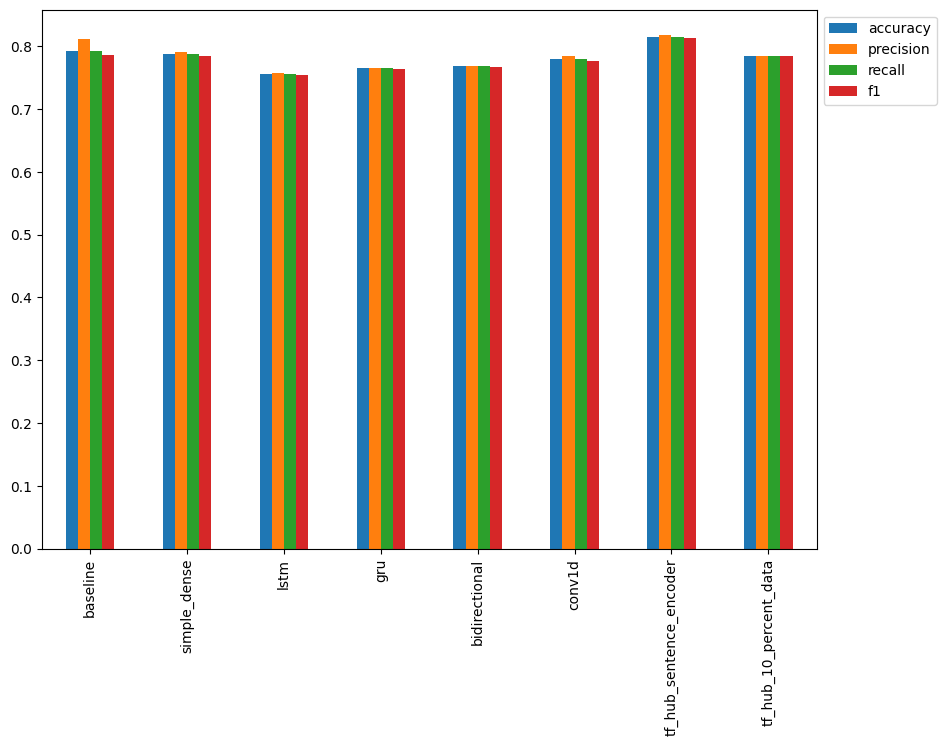

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

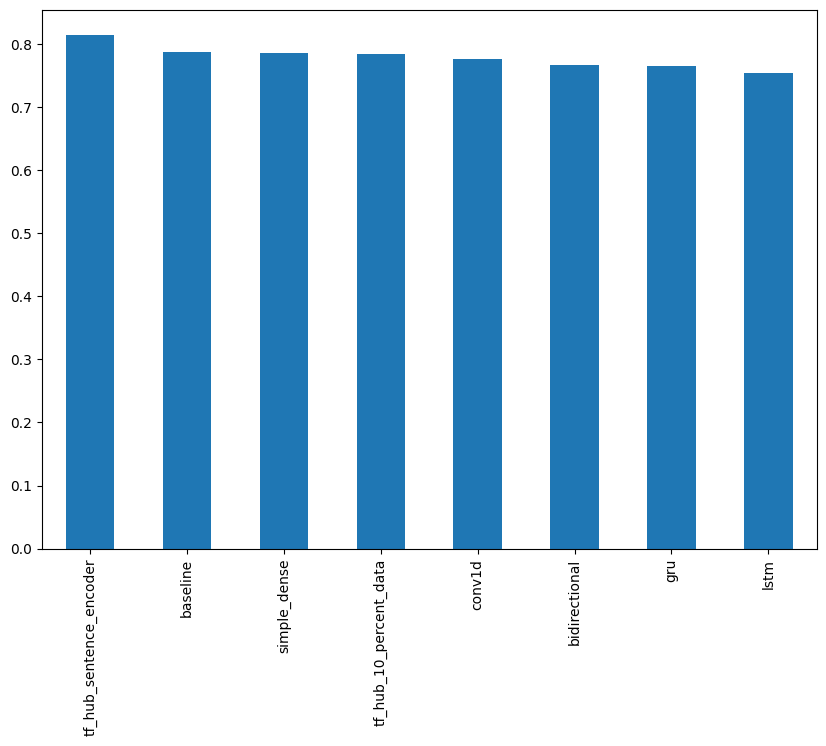

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
"""WEIGHTS AND BIASES"""

!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2024-05-09 13:38:26.463828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 13:38:26.463903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 13:38:26.465677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-09 13:38:27.960309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

##Combining Models ( Stacking/Ensembling )
- The idea behind model stacking is that if several uncorrelated models agree on a prediction, then the prediction must be more robust than a prediction made by a singular model.

- The keyword in the sentence above is uncorrelated, which is another way of saying, different types of models. For example, in our case, we might combine our baseline, our bidirectional model and our TensorFlow Hub USE model.

- Although these models are all trained on the same data, they all have a different way of finding patterns.

- If we were to use three similarly trained models, such as three LSTM models, the predictions they output will likely be very similar.

Ways of combining preds:
- Averaging - Take the output prediction probabilities of each model for each sample, combine them and then average them.
- Majority vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
- Model stacking - Take the outputs of each of your chosen models and use them as inputs to another model.

In [ ]:
# Get mean pred probs for 3 models
import numpy as np
baseline_pred_probs = np.max(model0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 79.26509186351706,
 'precision': 0.7925883561003346,
 'recall': 0.7926509186351706,
 'f1': 0.7919502242355856}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

NameError: name 'all_model_results' is not defined

In [ ]:
all_model_results

NameError: name 'all_model_results' is not defined

## Saving Models

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

"""
If you save a model as a HDF5, when loading it back in, you need to let TensorFlow know about any custom objects you've used (e.g. components which aren't built from pure TensorFlow, such as TensorFlow Hub components).
"""

"\nIf you save a model as a HDF5, when loading it back in, you need to let TensorFlow know about any custom objects you've used (e.g. components which aren't built from pure TensorFlow, such as TensorFlow Hub components).\n"

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4306 - accuracy: 0.8176


[0.43055281043052673, 0.817585289478302]

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")
# # Load TF Hub Sentence Encoder SavedModel
#loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

##Finding the Most Wrong Examples

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.154699
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.735430
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986671
3,@camilacabello97 Internally and externally scr...,1,0.0,0.205991
4,Radiation emergency #preparedness starts with ...,1,1.0,0.744555


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.905184
759,FedEx will no longer transport bioterror patho...,0,1.0,0.855425
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.839689
628,@noah_anyname That's where the concentration c...,0,1.0,0.839456
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.825333
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.807059
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.790900
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.788026
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.773801
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.763879


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9051839709281921
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8554252982139587
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8396891355514526
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8394559621810913
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8253331184387207
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8070585131645203
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pr

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.05777861922979355
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.056444600224494934
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.053185008466243744
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05224110186100006
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.04944593831896782
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.04161972925066948
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1,

## Making Test Data Preds

In [ ]:
# Making predictions on the test dataset
import random
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 101ms/step
Pred: 1, Prob: 0.8943946957588196
Text:
ÛÏ@MacCocktail: 'The first casualty of war is truth.'
? Hiram Johnson (died this day) - in Tony Blairs case it died before the war! ??

----

1/1 [==============================] - 0s 93ms/step
Pred: 1, Prob: 0.8365408778190613
Text:
@TravDave @Kornbread_ICU especially where it happened. Really nothing to tear up. Burning the buildings saves the city money for real

----

1/1 [==============================] - 0s 73ms/step
Pred: 1, Prob: 0.9717769622802734
Text:
SEVERE WEATHER BULLETIN No. 6
FOR: TYPHOON ÛÏ#HannaPHÛ (SOUDELOR)
TROPICAL CYCLONE: WARNING

ISSUED AT 11:00 PM... http://t.co/fKoJd0YqK0

----

1/1 [==============================] - 0s 94ms/step
Pred: 0, Prob: 0.3591700494289398
Text:
who sank all night in submarine light of BickfordÛªs floated out and sat through the stale beer afternoon in desolate FugazziÛªs

----

1/1 [==============================] - 0s 72ms/step
Pred: 0, 

In [ ]:
# Turn Tweet into string
random_tweet = "Life like an ensemble: take the best choices from others and make your own"

def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")


# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=random_tweet)

1/1 [==============================] - 0s 284ms/step
Pred: 0.0 (not real disaster) Prob: 0.04438973590731621
Text:
Life like an ensemble: take the best choices from others and make your own


In [ ]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 45ms/step
Pred: 1.0 (real disaster) Prob: 0.9504550099372864
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


##Speed Score Tradeoff

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 18ms/step


(0.755638695000016, 0.0009916518307086825)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.06302198499997758, 8.270601706033802e-05)

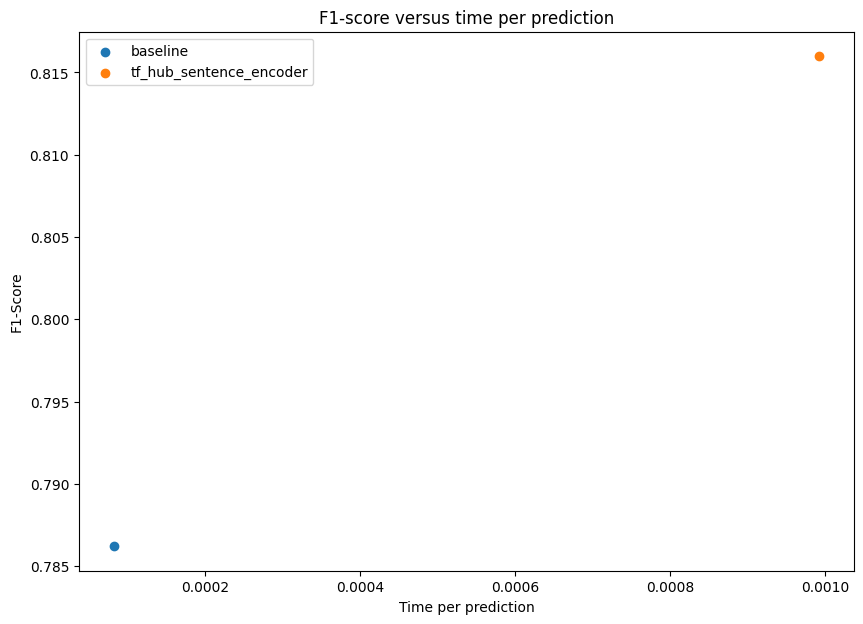

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");